In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud,STOPWORDS

In [3]:
df = pd.read_csv("/content/drive/MyDrive/British Airways/cleaned-reviews.csv")

In [5]:
df = df.iloc[:,1:]

In [6]:
df

,reviews,stars,month,year,country,seat_type,corpus
0,"y poor service, very frustrating. Firstly my f...",5,March,2023,United Kingdom,Economy Class,poor service frustrating firstly flight lhr ca...
1,"Generally poor. Sent to gate on time, sat mayb...",1,March,2023,United Kingdom,Economy Class,generally poor sent gate time sat maybe minute...
2,BA changed our prepaid seats at the last minut...,3,March,2023,United Kingdom,Economy Class,ba changed prepaid seat last minute charged u ...
3,Flew from London Heathrow to Marrakech. BA cha...,1,March,2023,United Kingdom,Economy Class,flew london heathrow marrakech ba changed pre ...
4,I was meant to fly in January to Algeria. I pa...,1,March,2023,United Kingdom,Economy Class,meant fly january algeria paid ticket day mean...
...,...,...,...,...,...,...,...
3486,Las Vegas-LGW 777 3 class. Business. The uniqu...,7,May,2014,United Kingdom,Business Class,la vega lgw class business unique forward faci...
3487,BA 059 London to Cape Town April 29 2014 econo...,10,May,2014,United Kingdom,Economy Class,ba london cape town april economy since flew b...
3488,An interesting contrast on recent Gatwick to T...,10,April,2014,United Kingdom,Business Class,interesting contrast recent gatwick turin back...
3489,Heathrow Marrakech. Had previously travelled o...,2,August,2012,United Kingdom,Economy Class,heathrow marrakech previously travelled britis...


### Counts of each star rating 

Text(0.5, 1.0, 'Count for each star rating')

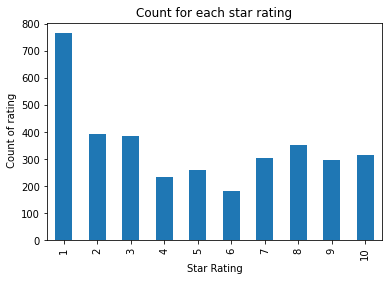

In [9]:
df.stars.value_counts().sort_index().plot(kind="bar")
plt.xlabel('Star Rating')
plt.ylabel(" Count of rating")
plt.title("Count for each star rating")

In [10]:
df.stars.mean()

4.818676596963621

Which country gave most reviews?

In [11]:
df_country_review = pd.DataFrame(df.country.value_counts().head(10)).reset_index()
df_country_review

,index,country
0,United Kingdom,2227
1,United States,363
2,Australia,152
3,Canada,106
4,Germany,59
5,Ireland,38
6,South Africa,38
7,Switzerland,37
8,Netherlands,33
9,Singapore,26


In [12]:
df_country_review.rename(columns={'index':'country','country':'count'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

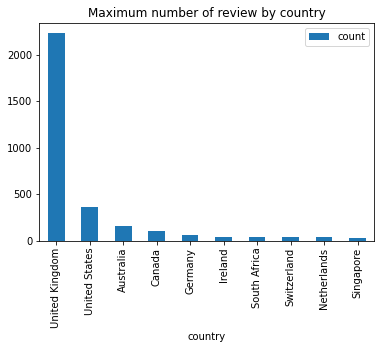

In [13]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

### Which year got most reviews.

In [16]:
df_year_review = pd.DataFrame(df.year.value_counts().sort_index()).reset_index()
#df_year_review = df_year_review.sort_values("index")

Text(0.5, 1.0, 'Maximum number of review by year')

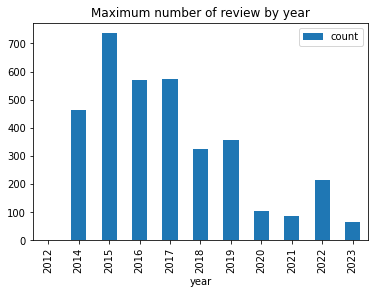

In [17]:
df_year_review.rename(columns={'index':'year','year':'count'}, inplace=True)
df_year_review.plot(kind="bar", x='year')
plt.title("Maximum number of review by year")

### Which month got most reviews?

Text(0.5, 1.0, 'Maximum number of review by month')

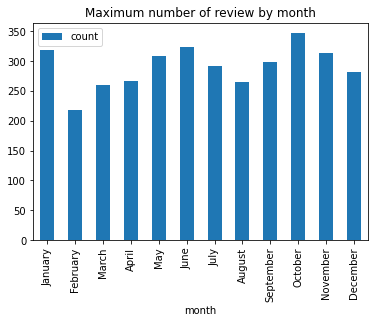

In [18]:
month_order = ['January','February','March','April','May','June','July','August', 'September', 'October','November','December']
df_month_review = pd.DataFrame(df.month.value_counts().loc[month_order]).reset_index()
df_month_review.rename(columns={'index':'month','month':'count'}, inplace=True)
df_month_review.plot(kind="bar", x='month')
plt.title("Maximum number of review by month")

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

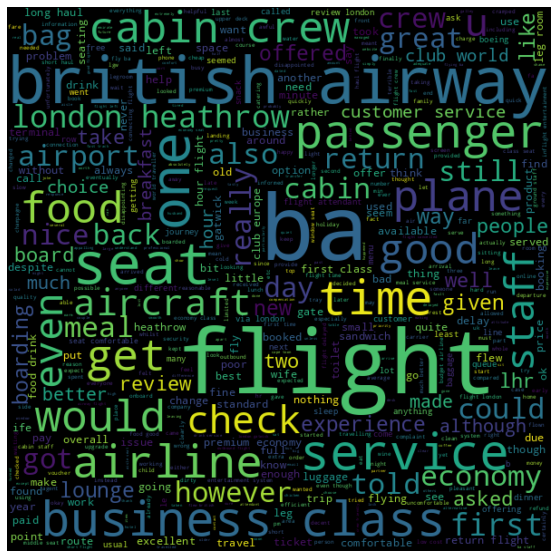

In [20]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

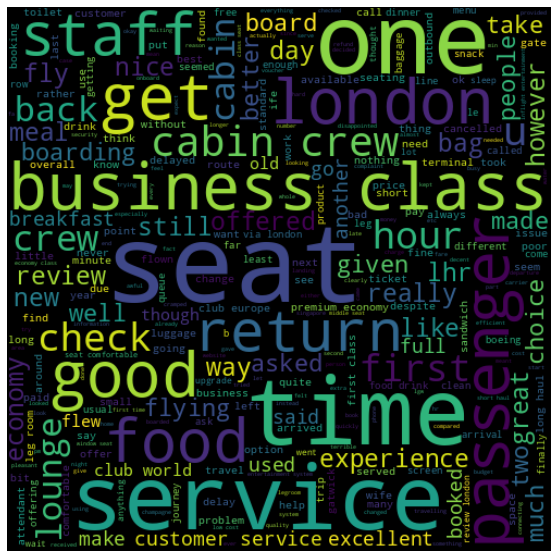

In [22]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow","airport", "aircraft", "could","even", "would","told","although","got"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

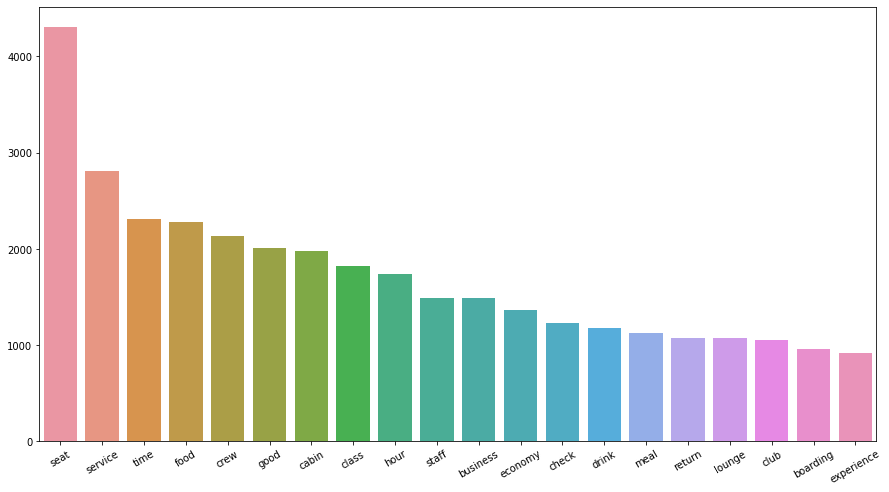

In [24]:
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
#all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

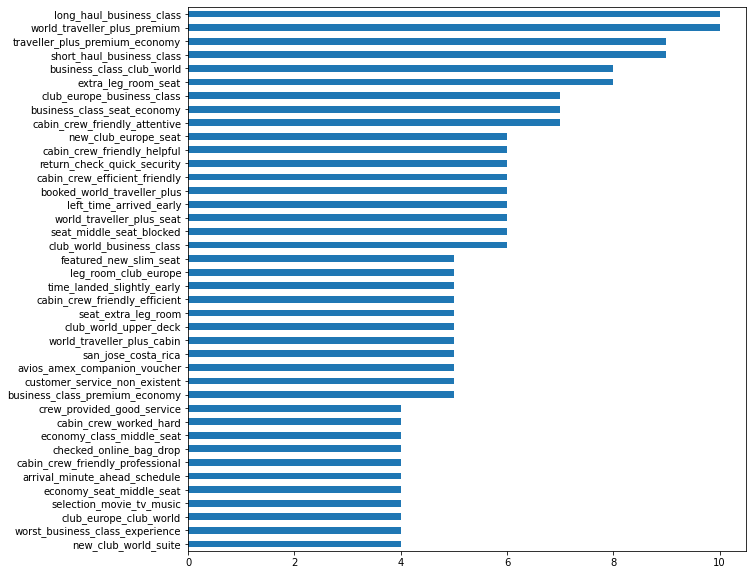

In [25]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [26]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

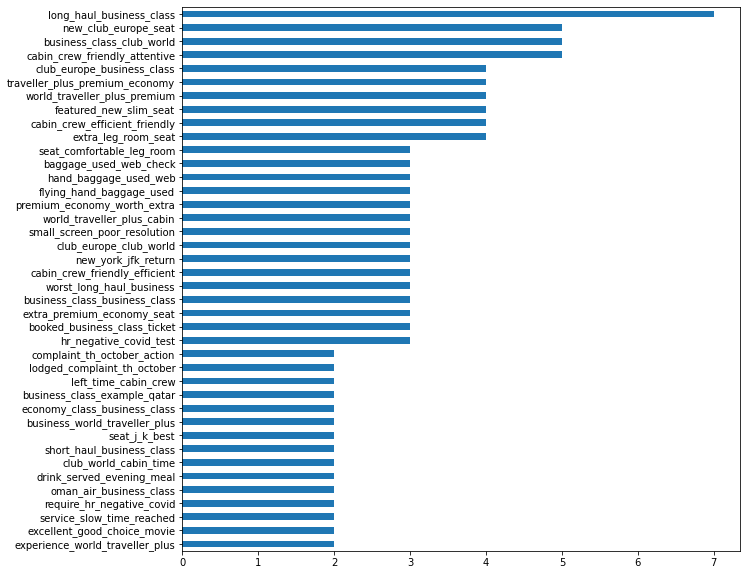

In [27]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

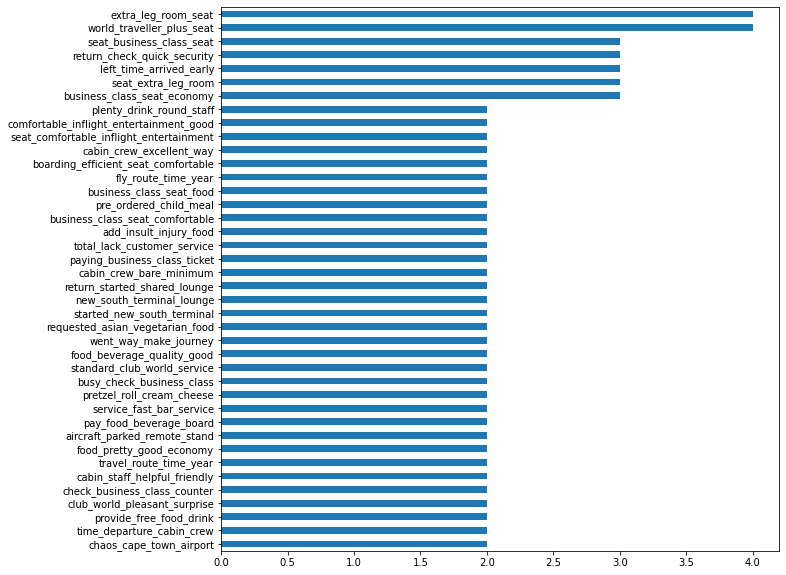

In [28]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

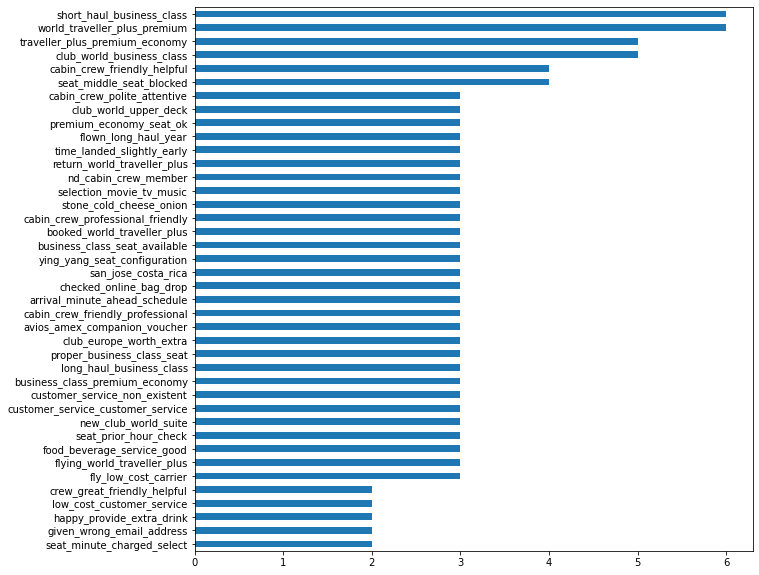

In [29]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

## Modelling using Latent Dirichlet Allocation

In [34]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()


In [35]:
tf_feature_names

array(['aa', 'ab', 'aback', ..., 'zurich', 'zusammenschluss', 'zzza'],
      dtype=object)

In [36]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [37]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,2445.1,ba,60.7,ba,121.1,seat,1518.2,flight,1964.7,seat,867.5,kg,48.3,flight,1653.8
1,ba,1250.2,lhr,38.9,class,119.0,ba,1080.7,seat,1493.3,ba,587.5,bag,35.6,good,868.6
2,hour,846.1,vie,32.1,first,112.7,british,944.1,crew,965.1,class,464.2,boarding,34.9,ba,777.2
3,london,618.9,seat,22.1,business,48.7,airway,931.5,cabin,876.7,food,435.1,staff,33.3,time,752.4
4,told,599.9,flight,20.3,service,46.6,airline,929.8,ba,802.8,service,404.0,ba,31.9,crew,724.3
5,airway,573.3,vueling,20.2,seat,45.3,flight,904.2,meal,734.0,flight,391.1,passenger,18.8,service,643.0
6,customer,564.6,lounge,18.5,poor,31.7,class,684.8,food,696.1,business,353.0,allowance,15.3,food,592.8
7,would,560.9,sfo,17.3,cabin,25.0,economy,618.9,good,662.3,club,342.8,luggage,15.1,check,456.5
8,british,559.9,leg,11.7,london,24.7,london,608.7,service,623.2,first,329.3,rude,13.7,drink,455.0
9,time,543.2,zrh,11.1,lounge,24.0,business,603.3,time,544.8,cabin,282.9,check,13.5,lounge,434.0


## Modelling using NMF

In [38]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.04555303, 0.01919954],
       [0.02504756, 0.04226228],
       [0.0290946 , 0.06819264],
       ...,
       [0.0447869 , 0.01693135],
       [0.01072285, 0.02694442],
       [0.07719148, 0.05887291]])

In [39]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [40]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,36.0,seat,15.0
1,ba,12.2,ba,7.9
2,hour,7.9,class,6.4
3,time,7.1,food,5.1
4,london,6.3,business,5.0
5,service,5.8,service,4.9
6,airway,5.8,cabin,4.7
7,british,5.6,good,4.4
8,would,5.0,crew,4.3
9,staff,4.3,economy,4.0
